Will start running some basic statistics and info diving on the cleaned data here

In [178]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction import text
from wordcloud import WordCloud

In [11]:
ign_df = pd.read_pickle('ign_data/ign_pass_one.pkl')
ign_df.head()

,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...


In [4]:
ign_dtm = pd.read_pickle('ign_data/ign_pass_one_dtm.pkl')
ign_dtm.head()

,00,000,000000,00001,00005,00028,00039,00044,00050,000dpi,...,zx,zxs,zynga,zz,zzz,zzzz,état,été,ôkami,über
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(ign_dtm.shape)
sum_dtm = ign_dtm.sum()
sum_dtm.head()

(11675, 81811)


00         58
000       514
000000     10
00001       1
00005       2
dtype: int64

In [70]:
print(sum_dtm.shape)
print(sum_dtm.sort_values(ascending=False)[:50])


(81811,)
game          92115
like          44607
just          32246
time          30108
ll            28755
new           25442
games         22458
play          22362
way           20278
players       19124
make          16816
really        15704
ve            15485
mode          14862
dir           14727
ltr           14719
little        14606
world         14556
good          14287
player        14273
level         13835
story         13289
fun           12761
character     12483
gameplay      12445
right         12323
different     12259
screen        12256
don           12132
use           11811
doesn         11499
experience    11484
enemies       11470
com           11425
bit           11420
characters    11189
playing       10738
data          10716
isn           10606
things        10604
feel          10142
great         10116
u0026          9992
need           9903
series         9527
makes          9443
ign            9440
action         9292
want           9260
control    

# Maybe examine most used words by game score

In [7]:
# hold off until further in the analysis when I can use this level of refinement

corpus_dtm = pd.read_csv('ign_data/ign_corpus_pass_one_dtm.csv')
print(corpus_dtm.shape)
corpus_sum_dtm = corpus_dtm.sum()

KeyboardInterrupt: 

In [29]:
null_score_df = ign_df.loc[ign_df['review_score']=='null']
print(null_score_df.shape)
null_score_df.head()


(3, 14)


,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...


# Consider redoing the analysis with reviews from dlc and wireless removed

In [31]:
# print(type(ign_df['review_score'].loc[1]))

# let's add some more data pieces 

ign_filtered_df = ign_df.loc[ign_df['review_score']!='null']
ign_filtered_df.reset_index(drop=True)
# ign_filtered_df.head()

def make_float(text):
    
    new_float = float(text)
    
    return new_float

def num_characters(text):
    
    number = len(text)
    
    return number

def num_words(text):
    
    number = len(text.split(' '))
    
    return number

ign_filtered_df['review_score_float'] = pd.DataFrame(ign_filtered_df.review_score.apply(make_float))
ign_filtered_df['number_character_review'] = pd.DataFrame(ign_filtered_df.cleaned_review_body.apply(num_characters))
ign_filtered_df['number_words_review'] = pd.DataFrame(ign_filtered_df.cleaned_review_body.apply(num_words))
ign_filtered_df.head()

C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TerrenceJEdmonds\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...,6.5,3705,642
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...,4.5,3770,648
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...,5.5,2675,474
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...,6.5,1854,349
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...,9.0,2938,527


In [210]:
# save to file again
ign_filtered_df.to_pickle('ign_data/ign_data_pass_two.pkl')

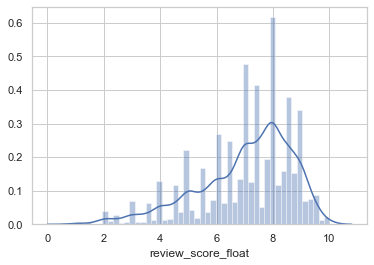

In [35]:
# make some basic plots of my numerical stuff
sns.set(style='whitegrid')
# sns.violinplot(ign_filtered_df['review_score_float'])
sns.distplot(ign_filtered_df['review_score_float'])
plt.show()

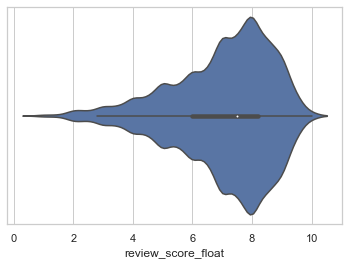

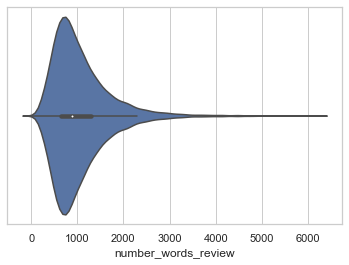

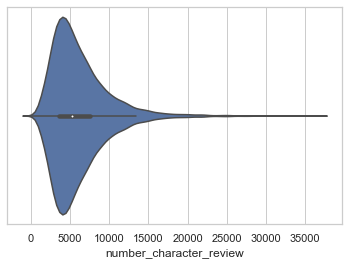

In [41]:
sns.violinplot(ign_filtered_df['review_score_float'])
plt.show()
sns.violinplot(ign_filtered_df['number_words_review'])
plt.show()
sns.violinplot(ign_filtered_df['number_character_review'])
plt.show()

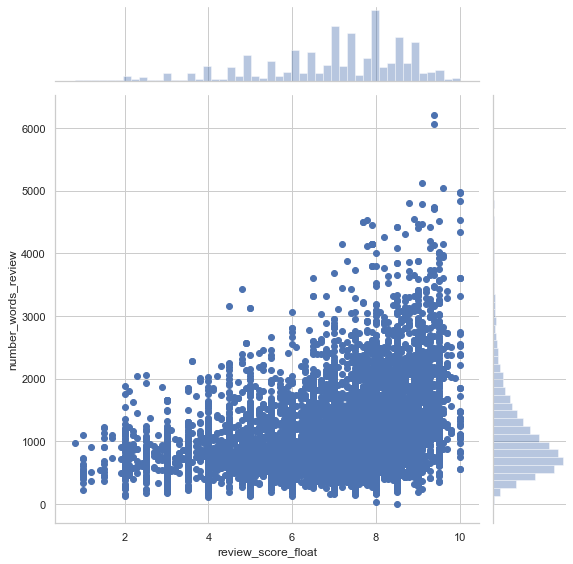

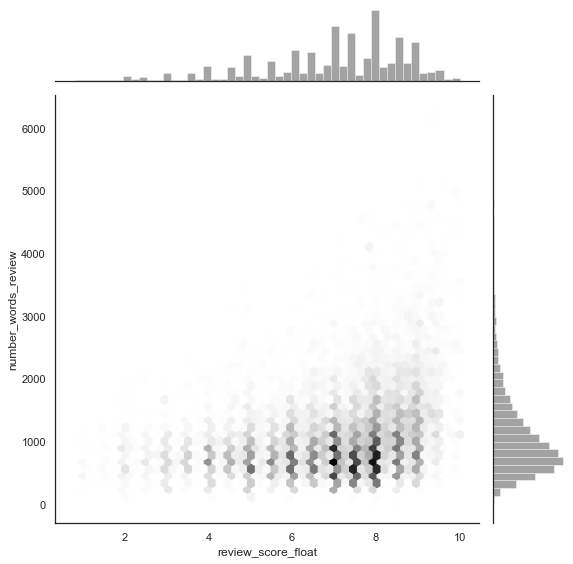

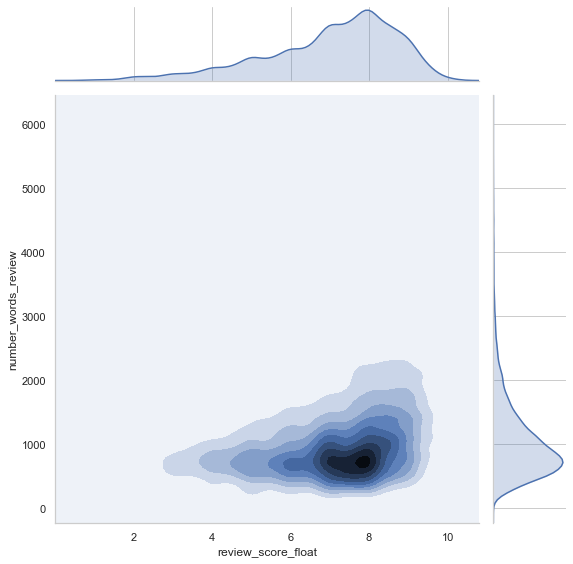

correlation =  0.3059467207292463


In [181]:
some_numbers_df = ign_filtered_df[['review_score_float','number_words_review','number_character_review']]
some_numbers_df.head()
height = 8
sns.jointplot(y='number_words_review', x='review_score_float', data=some_numbers_df, height=height)
plt.show()
with sns.axes_style('white'):
    sns.jointplot(y='number_words_review', x='review_score_float', data=some_numbers_df, 
                  kind='hex', color='k', height=height)
plt.show()
sns.jointplot(y='number_words_review', x='review_score_float', 
              data=some_numbers_df, kind='kde', height=height)
plt.show()

# calculate correlation
col1 = ign_filtered_df['review_score_float']
col2 = ign_filtered_df['number_words_review']
score_word_corr = col1.corr(col2)
print('correlation = ', score_word_corr)

In [167]:
# high number of words doesn't seem to be a mistake
high_num_words = ign_filtered_df.loc[ign_filtered_df['number_words_review']>4500]
high_num_words.reset_index()
place = 13430
print(high_num_words.shape)
print(high_num_words['links'].loc[place])
# high_num_words['cleaned_review_body'].loc[place]
high_num_words.head()

(20, 17)
https://www.ign.com/articles/2002/05/15/morrowind-review


,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review
3273,https://www.ign.com/articles/2009/09/09/little...,"\u003csection class=\""article-page\""\u003eIt's...",It's been a good while since we saw the first...,"""As you can see, I had a ton to say in this re...",9.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3""],",2012-05-10T09:51:23+0000,2009-09-09T23:55:00+0000,"""Chris Roper and Greg Miller""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, ]","""LittleBigPlanet: Game of the Year Edition Rev...",its been a good while since we saw the first ...,9.5,23764,4512
4224,https://www.ign.com/articles/2008/11/10/wwe-sm...,"\u003csection class=\""article-page\""\u003eIt's...",It's been awhile since I came across a collec...,"""In the end, WWE SmackDown vs. Raw 2009 (Colle...",7.8,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360""],",2012-05-11T13:19:07+0000,2008-11-10T21:04:00+0000,"""Greg Miller""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, ]","""WWE SmackDown vs. Raw 2009 (Collector's Editi...",its been awhile since i came across a collect...,7.8,24321,4529
4884,https://www.ign.com/articles/2008/04/25/grand-...,"\u003csection class=\""article-page\""\u003eCrim...","Criminals are an ugly, cowardly lot more wort...","""Grand Theft Auto III was a revolutionary titl...",10,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360""],",2012-05-12T08:43:52+0000,2008-04-25T22:00:00+0000,"""Hilary Goldstein""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, ]","""Grand Theft Auto IV Review""",criminals are an ugly cowardly lot more worth...,10.0,26357,4839
4891,https://www.ign.com/articles/2008/04/25/grand-...,"\u003csection class=\""article-page\""\u003eCrim...","Criminals are an ugly, cowardly lot more wort...","""Grand Theft Auto III was a revolutionary titl...",10,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360""],",2012-05-12T08:46:34+0000,2008-04-25T20:43:00+0000,"""Hilary Goldstein""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, ]","""Grand Theft Auto IV Review""",criminals are an ugly cowardly lot more worth...,10.0,27071,4961
5975,https://www.ign.com/articles/2008/06/13/metal-...,"\u003csection class=\""article-page\""\u003eTwen...","Twenty-one years ago, the gaming world was in...","""Is it possible to give a game an 11? If so, ...",10,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3""],",2012-05-13T03:46:17+0000,2008-06-13T19:24:00+0000,"""Jeff Haynes""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, ]","""Metal Gear Solid 4: Guns of the Patriots Limi...",twentyone years ago the gaming world was intr...,10.0,25457,4538


In [171]:
low_num_words = ign_filtered_df.loc[ign_filtered_df['number_words_review']<200]
print(low_num_words.shape)
print(low_num_words['links'].loc[7033])
print(low_num_words['cleaned_review_body'].loc[10])
low_num_words.head()

(47, 17)
https://www.ign.com/articles/2007/11/14/crazy-penguin-catapult-review
 You know all about Kung Fu Panda, but don't expect   'Kung Fu Dragon to be a similar cartoon romp starring an animal-in-training \u0026#x2013; your characters here are human. Three different humans, each of whom is attempting to climb up an endless waterfall by relentlessly jumping, double-jumping, and bouncing off the backs of the birds, branches and boulders they encounter along the way.     --  --  This is a very simple, single-idea game on sale for just two bucks, so waterfall climbing is all you get \u0026#x2013; and it's not too bad of a one-note design either. It's addictive to try to get higher and higher than you did the time before, as the game saves both your high score and the maximum elevation you've reached in each try. The three different characters each play a bit differently too (once you unlock them all) and their slowfall and rapidfall abilities give your single action of jumping around a

,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review
10,https://www.ign.com/articles/2011/07/22/kung-f...,"\u003csection class=\""article-page\""\u003eYou ...","You know all about Kung Fu Panda, but don't e...","""The dead space between the upper and lower sc...",7,":[""review"",""legacy"",""nintendo-ds"",""games"",""kun...",":[""ds""],",2011-10-18T06:16:14+0000,2011-07-22T06:57:00+0000,"""Lucas M. Thomas""","[review, legacy, nintendo-ds, games, kung-fu-d...","[ds, ]","""Kung Fu Dragon Review""",you know all about kung fu panda but dont exp...,7.0,989,177
121,https://www.ign.com/articles/2011/12/16/just-s...,"\u003csection class=\""article-page\""\u003eOh, ...","Oh, for Santa's sake -- they made another one...","""As it is, it's easy to keep this one of your ...",3,":[""review"",""legacy"",""nintendo-ds"",""games"",""jus...",":[""ds""],",2012-01-05T20:19:06+0000,2011-12-16T07:55:00+0000,"""Lucas M. Thomas""","[review, legacy, nintendo-ds, games, just-sing...","[ds, ]","""Just SING! Christmas Vol. 3 Review""",oh for santas sake they made another one of ...,3.0,913,181
137,https://www.ign.com/articles/2011/12/08/word-s...,"\u003csection class=\""article-page\""\u003eDeve...",Developer 'Digital Leisure has been adaptin...,"""Really, Word Searcher 4's as basic as it gets...",5,":[""review"",""legacy"",""nintendo-ds"",""games"",""wor...",":[""ds""],",2012-01-05T20:53:37+0000,2011-12-08T23:25:00+0000,"""Lucas M. Thomas""","[review, legacy, nintendo-ds, games, word-sear...","[ds, ]","""Word Searcher 4 Review""",developer digital leisure has been adapting...,5.0,870,159
316,https://www.ign.com/articles/2011/10/21/castle...,"\u003csection class=\""article-page\""\u003eBill...","Billed by its developers as \""a beginner's RT...","""But all the while nothing ever feels too hard...",7.5,":[""review"",""legacy"",""nintendo-ds"",""games"",""cas...",":[""ds""],",2012-01-18T18:25:31+0000,2011-10-21T06:59:00+0000,"""Lucas M. Thomas""","[review, legacy, nintendo-ds, games, castle-co...","[ds, ]","""Castle Conqueror -- Revolution Review""",billed by its developers as a beginners rts ...,7.5,1061,189
367,https://www.ign.com/articles/2011/10/07/house-...,"\u003csection class=\""article-page\""\u003eThe ...",The curmudgeonly Dr. Gregory House is back fo...,"""So House's third episode earns the same ratin...",4,":[""review"",""legacy"",""nintendo-ds"",""games"",""hou...",":[""ds""],",2012-01-18T20:00:18+0000,2011-10-07T06:57:00+0000,"""Lucas M. Thomas""","[review, legacy, nintendo-ds, games, house-md-...","[ds, ]","""House M.D. - Episode 3: Skull and Bones Review""",the curmudgeonly dr gregory house is back for...,4.0,858,147


In an effort to understand these plots a little better, lets take some averages of the data in bins (either half a point to a point) and see average word length. Should also plot the standard deviation

- Could try to redistribute scores based on my understanding of their score criteria (https://corp.ign.com/review-practices) and just renormalizing it. 

- Could ask the question, what's the probability that a low score review gets many words written about it (bayesian stats BaBy!)

- Can also compare the Bayesian approach to asking the question above and compare it to moving some number of standard deviations away from the mean

- Questions: Are there similar tags between all games with short word counts? Are they mobile games? Or do a lot of them have authors in common?

Bayesian style question: 
- Given that a review had a score of X, what is the probability that it's length is N?
    - Can code up a solution and should be able to plot it as a function of N
    
Looking at pdg (http://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf) for some guidance

# (7/7/2020)
- So what I think I could do to resolve my lack of having a p(X|N) problem is I can just have a roughly empirical distribution for different bins, and that can be my p(X|N), then I can derive a p(N|X), and compare that to an empirical distribution of it as well and see how they look
    - I could also just try to fit one of several well known distributions to it, and use some of the available parameters there
- Michael also suggested I could fit some parameters with something called the method of moments, and also recommended that I start with log-normal and gamma distributions
- I also want to go ahead and calculate the correlation

In [83]:
all_score_mean = pd.DataFrame.mean(some_numbers_df['review_score_float'])
all_score_std = pd.DataFrame.std(some_numbers_df['review_score_float'])

print('mean = {} \t std = {}'.format(all_score_mean, all_score_std))
print('these results really just indicate that the distribution is non gaussian\n')

num_word_mean = pd.DataFrame.mean(some_numbers_df['number_words_review'])
num_word_std = pd.DataFrame.std(some_numbers_df['number_words_review'])
print('mean = {} \t std = {}'.format(num_word_mean, num_word_std))

mean = 7.034355723098059 	 std = 1.6702255157617851
these results really just indicate that the distribution is non gaussian

mean = 1053.612320082248 	 std = 620.5888781062706


In [218]:
review_score_midpoints = [(0.5+x) for x in range(0,9)]

sub_num_dfs = [some_numbers_df.loc[(some_numbers_df['review_score_float']>=x-0.5) & 
                                      (some_numbers_df['review_score_float']<x+0.5) ] 
                  for x in review_score_midpoints ]
# picking up the edge case
review_score_midpoints.append(9.5)
sub_num_dfs.append(some_numbers_df.loc[(some_numbers_df['review_score_float']>=9.0) & 
                                      (some_numbers_df['review_score_float']<=10)] )

sub_num_reviews = [x.shape[0] for x in sub_num_dfs]

review_score_means = [pd.DataFrame.mean(x['review_score_float']) for x in sub_num_dfs]
review_score_stds = [pd.DataFrame.std(x['review_score_float']) for x in sub_num_dfs]

num_words_mean = [pd.DataFrame.mean(x['number_words_review']) for x in sub_num_dfs ]
num_words_stds = [pd.DataFrame.std(x['number_words_review']) for x in sub_num_dfs ]


print('number of reviews in each bin/area =\t', sub_num_reviews, sum(sub_num_reviews) )
print(some_numbers_df.shape)
print()
print('score means = ', review_score_means, '\n')
print('score stds = ', review_score_stds)
print('\nnum_words_mean = ', num_words_mean, '\n')
print('num_words_std = ', num_words_stds, '\n')
num_words_stds[0] = 1
print(num_words_stds)

number of reviews in each bin/area =	 [1, 38, 196, 357, 751, 1190, 1753, 3077, 3086, 1223] 11672
(11672, 3)

score means =  [0.8, 1.3236842105263158, 2.2785714285714285, 3.2971988795518197, 4.352996005326238, 5.3411764705882305, 6.377410154021653, 7.374130646733815, 8.320382372002586, 9.20572363041701] 

score stds =  [nan, 0.3052993307650314, 0.2789173207150675, 0.2829281029862806, 0.31763870248657433, 0.3096191981934785, 0.3123279819700672, 0.3133675471341657, 0.29611637994267326, 0.2680473346988973]

num_words_mean =  [972.0, 677.1578947368421, 785.7091836734694, 798.4957983193277, 852.6138482023968, 867.0563025210084, 933.8899030233885, 979.2502437439064, 1172.0252754374594, 1547.6328699918233] 

num_words_std =  [nan, 272.3048298165018, 350.9142376302761, 344.9071493833949, 404.9970666823463, 415.55045746315733, 465.54730259548126, 570.2549310461225, 631.3604569415718, 899.7804388295785] 

[1, 272.3048298165018, 350.9142376302761, 344.9071493833949, 404.9970666823463, 415.55045746

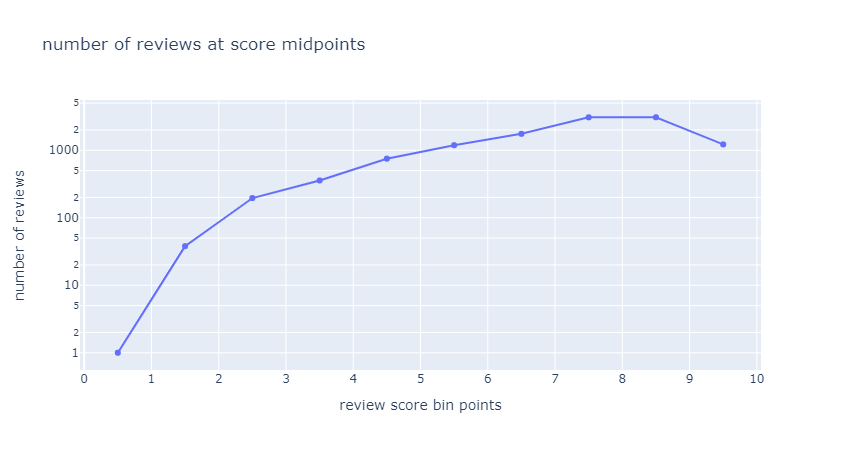

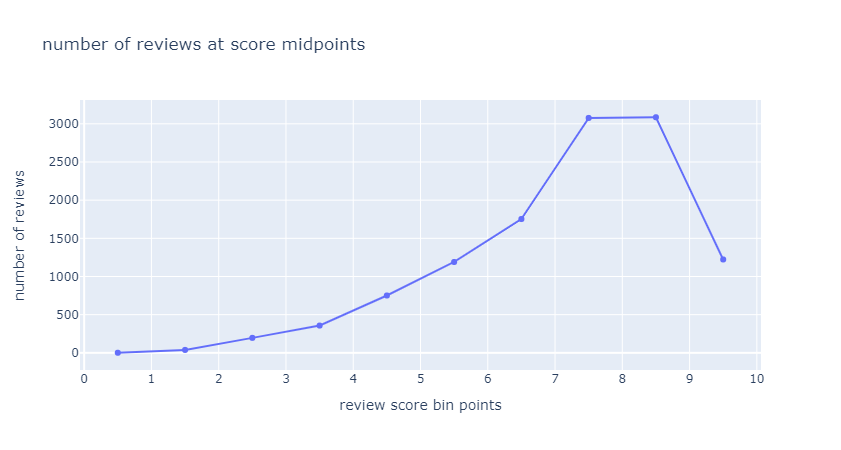

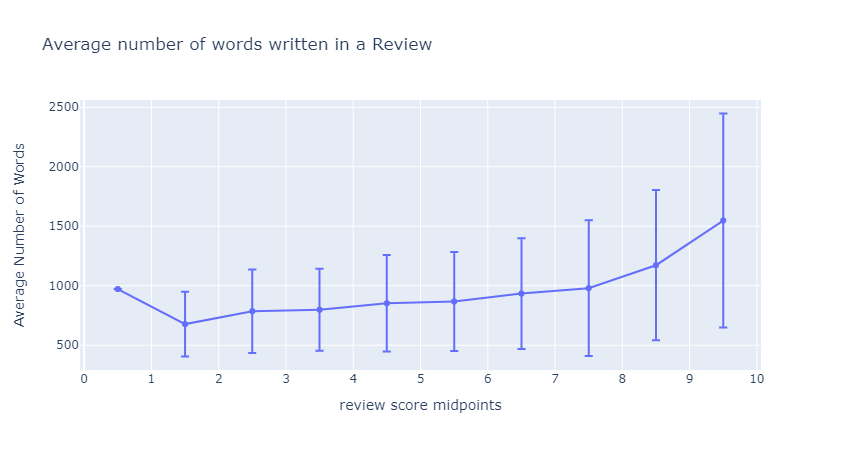

In [166]:
# plots for some of the statistics calculated above
# sns.lineplot(x=review_score_midpoints, y=sub_num_reviews, yscale='log')
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=review_score_midpoints, y=sub_num_reviews))
fig.update_layout(yaxis_type='log', title='number of reviews at score midpoints', 
                 xaxis_title='review score bin points', yaxis_title='number of reviews')
fig.update_xaxes(dtick=1.0)
fig.show()

print()
fig = go.Figure(data=go.Scatter(x=review_score_midpoints, y=sub_num_reviews))
fig.update_layout(title='number of reviews at score midpoints', 
                 xaxis_title='review score bin points', yaxis_title='number of reviews')
fig.update_xaxes(dtick=1.0)
fig.show()

print()
fig = go.Figure(data=go.Scatter(x=review_score_midpoints, 
                                y=num_words_mean, 
                                error_y=dict(type='data', 
                                             array=num_words_stds)))
fig.update_layout(title='Average number of words written in a Review', 
                  xaxis_title='review score midpoints', yaxis_title='Average Number of Words')
fig.update_xaxes(dtick=1.0)
fig.show()

Here I've split up the score into bins (not of equal sizes) to see average word count for each bin. Some follow up questions:
- How does the data look if I split the bins equally, i.e. if I have 10k reviews, each bin gets 1000 reviews going from lowest score to highest. What if I do 5 bins? This might give me a quick way to renormalize all of my data for a new scoring metric. How would this compare to mapping the scoring system to a normalized gaussian?

- What if I create word bins? What is the average score for a given length of an article?

- ~Maybe I should create histograms of each binned set of data~

- Should try to examine word length based on author, maybe some people just write more. And maybe some authors will specifically have a stronger polarity indicator

# Will start trying to do the Bayesian type analysis here

Might be even more worthwhile to ask how few words I can write and get away with because text generators have a difficult time writing many many words

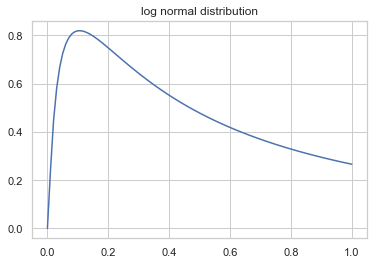

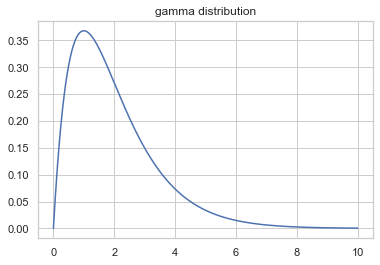

In [200]:
# first, set up some statistical distributions
s = 1.5 # changes peak shape, probably to 
x = np.linspace(start=0, stop=1, num=100)
y = scipy.stats.lognorm.pdf(x, s)
plt.plot(x,y)
plt.title('log normal distribution')
plt.show()

a = 2
x_gamma = np.linspace(start=0, stop=10, num=1000)
y_gamma = scipy.stats.gamma.pdf(x_gamma, a)
plt.plot(x_gamma,y_gamma)
plt.title('gamma distribution')
plt.show()

# from these two plots above, gamma distribution looks like it could be a great for fitting, but I should fit both
# can use both of these functions for likelihoods in each bin

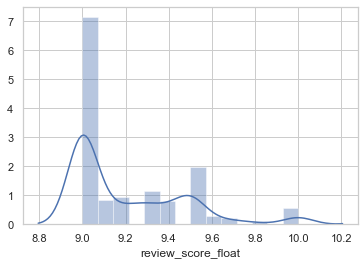

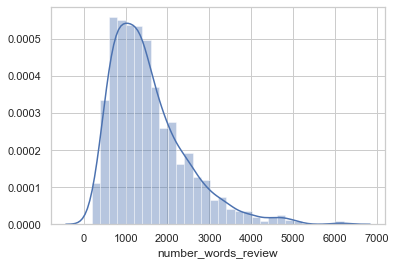

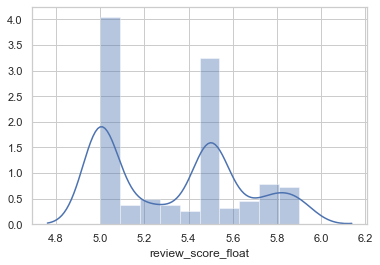

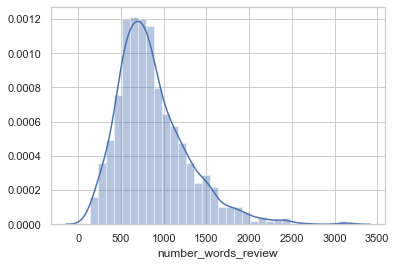

In [209]:
# let's examine the distributions of a couple of bins
sns.distplot(sub_num_dfs[9]['review_score_float'])
plt.show()
sns.distplot(sub_num_dfs[9]['number_words_review'])
plt.show()

pos = 5
sns.distplot(sub_num_dfs[pos]['review_score_float'])
plt.show()
sns.distplot(sub_num_dfs[pos]['number_words_review'])
plt.show()

# need to fit a distribution to each of these pieces now, and then I can answer some Bayesian questions

Want to also examine to see if specific phrases are present, and how often they appear
Phrases and variants to search for:
- made me feel like ...
    - makes me feel like
    - feel like
- it has a little something for everyone

In [224]:
i = 0
j = 0
k = 0
l = 0
m = 0
n = 0
p = 0
for row in ign_filtered_df.itertuples():
    if re.search('feel like', row.cleaned_review_body):
        i += 1
    if re.search('made me feel like', row.cleaned_review_body):
        j += 1
    if re.search('something for everyone', row.cleaned_review_body):
        k += 1
#         print(row.review_title)
    if re.search('something for everybody', row.cleaned_review_body):
        l += 1
#         print(row.review_title)
    if re.search('something for everyone', row.review_summary_rough):
        m += 1
#         print(row.review_title)
    if re.search('wireless', row.tags.lower()):
        n += 1
        
    if re.search('dlc', row.tags.lower()):
#         print(row.review_title)
        p += 1
# these phrases might be better found in the review summary
        
print(i, j, k, l, m, n, p)


2012 94 27 6 9 1163 76


Let's examine 